# Introduction

In this project we are analyzing data regarding species within several US National Parks. The data has been provided by Codecademy.com as part of the data science 2021 learning program.

## Goals

The goal of this project is to use python and several libraries to explore, clean, and analyze data contained within two separate CSV files. 

### 1. Explore - 
We must first import the data to determine if any cleaning needs to occur prior to analysis.

### 2. Clean - 
Any cleaning of the data must occur before we analyze for answers to our questions.

### 3. Analyze - 

The questions we wish to answer about this data are as follows:

- What is the distribution of species within the different protection statuses?
- How likely are certain animal categories to be endangered in comparison with all species?
- What are the most observed animal categories in each park?




### 1.1 Explore data

In [1]:
# first need to import necessary libraries 

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# create dataframes from csv files

species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')

In [5]:
# explore each df for traits and length

print('Species data: ', '\n')
print(species.head())
print('\n')
print(species.info())
print('\n')

print('Obervations data:', '\n')
print(obs.head(), '\n')
print(obs.info())

Species data:  

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   sc

###  2.1 Clean data - species

Let's take a closer look at the conservation_status column of Species:

In [6]:
print(species.conservation_status.unique())
print(species.conservation_status.value_counts(dropna=False))

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


NaN values should be updated. We can use 'Unprotected' for all NaN values:

In [7]:
species.fillna('Unprotected', inplace=True)

print(species.conservation_status.value_counts())

Unprotected           5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Review for any duplicate values in scientific_name column (should only be one of each scientific_name):

In [9]:
print('Total unique names: {}'.format(species.scientific_name.nunique()))
print('Total number of rows: {}'.format(len(species)))

Total unique names: 5541
Total number of rows: 5824


It appears there are duplicates so we will need to review these prior to removing them.

In [17]:
# create a for loop to loop through unique scientific_names to print out any names listed more than once:
pd.set_option('display.width', 1000)

for name in species.scientific_name.unique()[:25]:
    if len(species[species.scientific_name == name]) > 1:
        print(species[species.scientific_name == name])
        print('\n')

     category scientific_name        common_names conservation_status
4      Mammal  Cervus elaphus       Wapiti Or Elk         Unprotected
3017   Mammal  Cervus elaphus  Rocky Mountain Elk         Unprotected


     category         scientific_name                          common_names conservation_status
5      Mammal  Odocoileus virginianus                     White-Tailed Deer         Unprotected
3019   Mammal  Odocoileus virginianus  White-Tailed Deer, White-Tailed Deer         Unprotected


     category scientific_name                            common_names conservation_status
6      Mammal      Sus scrofa                     Feral Hog, Wild Pig         Unprotected
4447   Mammal      Sus scrofa  Pig, Pig (Feral), Wild Boar, Wild Boar         Unprotected


     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis l

Some duplicates have different common_names, however since those won't be used for this analysis we can disregard. The differing conseration_status, however, will need to be addressed.

In [23]:
# create a new for loop to find all duplicate scientific names that also have a differing conservation status

for name in species.scientific_name.unique():
    if (len(species[species.scientific_name == name]) > 1) and (species[species.scientific_name == name].conservation_status.nunique() > 1):
        print(species[species.scientific_name == name])
        print('\n')

     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout         Unprotected
3283     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened




two different scientific names show differing conservation status. We will update conservation status on each to the more severe option

In [27]:
species.loc[3020, 'conservation_status'] = 'Endangered'
species.loc[560, 'conservation_status'] = 'Threatened'

print(species[species.scientific_name == 'Canis lupus'])
print(species[species.scientific_name == 'Oncorhynchus mykiss'])

     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered
     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened
3283     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened


In [28]:
# remove duplicates and check that total rows now equals 5541

species.drop_duplicates(subset = 'scientific_name', inplace=True)
print(len(species))

5541


species dataset is now ready for analysis

## 2.2 clean Observations dataset

In [29]:
# how many parks are listed in the data

print(obs.park_name.unique())
print(obs.park_name.nunique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
4


In [30]:
print(obs.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


are any scientific names listed in the same park more than once? should only be 1 line per park name...

In [31]:
print(obs[obs.scientific_name == 'Canis lupus'])

      scientific_name                            park_name  observations
1294      Canis lupus               Yosemite National Park            35
1766      Canis lupus                  Bryce National Park            27
7346      Canis lupus                  Bryce National Park            29
9884      Canis lupus                  Bryce National Park            74
10190     Canis lupus  Great Smoky Mountains National Park            15
10268     Canis lupus            Yellowstone National Park            60
10907     Canis lupus            Yellowstone National Park            67
13427     Canis lupus            Yellowstone National Park           203
17756     Canis lupus  Great Smoky Mountains National Park            14
19330     Canis lupus               Yosemite National Park           117
19987     Canis lupus               Yosemite National Park            44
20353     Canis lupus  Great Smoky Mountains National Park            30


here we see that Canis lupus is listed at the same park multiple times so we will need to combine the observations for each scientific_name and park_name into one observation count

In [36]:
obs = obs.groupby(['scientific_name', 'park_name']).agg('sum').reset_index()
print(obs[obs.scientific_name == 'Canis lupus'])

     scientific_name                            park_name  observations
3216     Canis lupus                  Bryce National Park           130
3217     Canis lupus  Great Smoky Mountains National Park            59
3218     Canis lupus            Yellowstone National Park           330
3219     Canis lupus               Yosemite National Park           196


obs data is now ready for analysis

## 3 - Analysis

## 3.1 Plotting distribution of conservation status

In [38]:
# create a new df that does not include the 'unprotected' rows since they will not be plotted

specons_dist = species[species.conservation_status != 'Unprotected']
print(specons_dist.head())

   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern


In [40]:
# create yet another new df with the amount of scientific names in each category/park_name combination

specons_dist2 = specons_dist.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
print(specons_dist2)

             category conservation_status  scientific_name
0           Amphibian          Endangered                1
1           Amphibian  Species of Concern                4
2           Amphibian          Threatened                2
3                Bird          Endangered                4
4                Bird         In Recovery                3
5                Bird  Species of Concern               68
6                Fish          Endangered                3
7                Fish  Species of Concern                4
8                Fish          Threatened                4
9              Mammal          Endangered                6
10             Mammal  Species of Concern               22
11             Mammal          Threatened                2
12  Nonvascular Plant  Species of Concern                5
13            Reptile  Species of Concern                5
14     Vascular Plant          Endangered                1
15     Vascular Plant  Species of Concern               

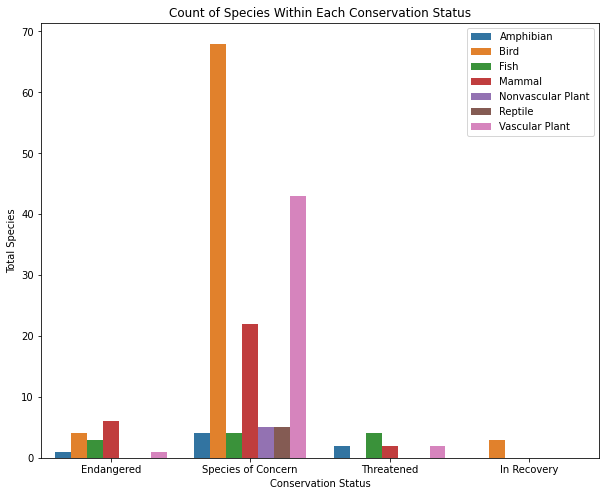

In [43]:
# plot the amounts

plt.figure(figsize = (10,8))
ax = sns.barplot(data=specons_dist2, x='conservation_status', y='scientific_name', hue='category')
plt.legend(loc=1)
plt.title('Count of Species Within Each Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Total Species')
plt.show()

The plot above shows that Species of Concern contains the most species under protection status, with Birds having the highest number followed by Vascular Plants and Mammals.

## 3.2 Likelihood of certain species to be under protection status

In [44]:
# update the conservation_status column to show all statuses as 'Protected'

species2 = species.replace(['Endangered', 'Species of Concern', 'Threatened', 'In Recovery'], 'Protected')
print(species2.head())

  category                scientific_name                                       common_names conservation_status
0   Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole         Unprotected
1   Mammal                      Bos bison                              American Bison, Bison         Unprotected
2   Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...         Unprotected
3   Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)         Unprotected
4   Mammal                 Cervus elaphus                                      Wapiti Or Elk         Unprotected


In [70]:
#pivot results
species2_pivot = pd.pivot_table(data=species2, index = 'category', columns='conservation_status', values='scientific_name', aggfunc= 'count', margins=True)
species2_pivot.sort_values(by='Protected', ascending=False, inplace=True)
print(species2_pivot)

conservation_status  Protected  Unprotected   All
category                                         
All                        179         5362  5541
Bird                        75          413   488
Vascular Plant              46         4216  4262
Mammal                      30          146   176
Fish                        11          114   125
Amphibian                    7           72    79
Nonvascular Plant            5          328   333
Reptile                      5           73    78


In [71]:
# drop the All column

species2_pivot1 = species2_pivot.drop('All', axis=1)
print(species2_pivot1)

conservation_status  Protected  Unprotected
category                                   
All                        179         5362
Bird                        75          413
Vascular Plant              46         4216
Mammal                      30          146
Fish                        11          114
Amphibian                    7           72
Nonvascular Plant            5          328
Reptile                      5           73


Now that we have the values for each category clearly listed, we can perform chi2 tests for each category against All:

- Null hypothesis: There is no difference in protection status between a category of species and All species.
- Alternative: There is a difference in protection status between a category of species and All species.

In [79]:
from scipy.stats import chi2_contingency

# for loop to run each test against All

significance_threshold = 0.05

for category in species2_pivot1.index[1:]:
    print(species2_pivot1.loc[['All', category]])
    chi2, pval, dof, expected = chi2_contingency(species2_pivot1.loc[['All', category]])
    print(expected)
    print(pval)
    if pval <= significance_threshold:
        print('There is a difference.')
        if species2_pivot1.loc[category].Protected >= expected[1][0]:
            print(category, 'is more likely to be under protection status than the total categories observed.')
        else:
            print(category, 'is less likely to be under protection status than the total categories observed.')
    
    else:
        print('There is no difference in protection status.')
        print('The category is equally likely to be under protection status compared to the total categories observed.')
    
    print('\n')


conservation_status  Protected  Unprotected
category                                   
All                        179         5362
Bird                        75          413
[[ 233.44070327 5307.55929673]
 [  20.55929673  467.44070327]]
7.723449629751259e-37
There is a difference.
Bird is more likely to be under protection status than the total categories observed.


conservation_status  Protected  Unprotected
category                                   
All                        179         5362
Vascular Plant              46         4216
[[ 127.17790472 5413.82209528]
 [  97.82209528 4164.17790472]]
2.898911520201638e-12
There is a difference.
Vascular Plant is less likely to be under protection status than the total categories observed.


conservation_status  Protected  Unprotected
category                                   
All                        179         5362
Mammal                      30          146
[[ 202.56585622 5338.43414378]
 [   6.43414378  169.56585622]]
4.94938

In [98]:
# create function to test one category against another

def chi2_func(category1, category2):
    print(species2_pivot1.loc[[category1, category2]])
    chi2, pval, dof, expected = chi2_contingency(species2_pivot1.loc[[category1, category2]])
    print('pval =',pval)
    print('Expected =', expected)
    

    
    
chi2_func('Bird', 'Mammal')
chi2_func('Vascular Plant', 'Nonvascular Plant')

conservation_status  Protected  Unprotected
category                                   
Bird                        75          413
Mammal                      30          146
pval = 0.6875948096661336
Expected = [[ 77.1686747 410.8313253]
 [ 27.8313253 148.1686747]]
conservation_status  Protected  Unprotected
category                                   
Vascular Plant              46         4216
Nonvascular Plant            5          328
pval = 0.6623419491381985
Expected = [[4.73040261e+01 4.21469597e+03]
 [3.69597388e+00 3.29304026e+02]]


## 3.4 What is the breakdown of categories observed at each park?

In [94]:
# merge dataframes

merged = pd.merge(species, obs, on='scientific_name')
print(merged.info())

merged = merged.groupby(['park_name', 'category']).observations.sum().reset_index()
print(merged)
merged1 = merged.groupby(['park_name', 'category'], sort=False).observations.sum()
print(merged1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             22164 non-null  object
 1   scientific_name      22164 non-null  object
 2   common_names         22164 non-null  object
 3   conservation_status  22164 non-null  object
 4   park_name            22164 non-null  object
 5   observations         22164 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None
                              park_name           category  observations
0                   Bryce National Park          Amphibian          7380
1                   Bryce National Park               Bird         51647
2                   Bryce National Park               Fish         12423
3                   Bryce National Park             Mammal         20550
4                   Bryce National Park  Nonvascular Plant         32992
5      

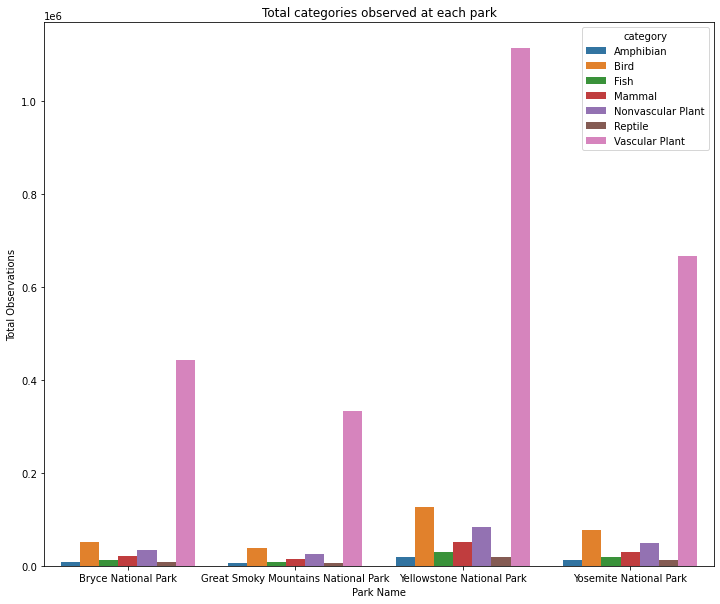

In [97]:
plt.figure(figsize=(12,10))
ax = sns.barplot(data=merged, x='park_name', y='observations', hue='category')
plt.title('Total categories observed at each park')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.show()